In [4]:
### Intro to ML, High school level - Practical session ###
# Alice Schoenauer Sebag, Feb. 2018

## First of all, let us download the data
# The original dataset is publicly available here: https://data.broadinstitute.org/bbbc/BBBC021/
# It was pre-processed using the method described in this paper: https://www.nature.com/articles/nbt.3419

import os, pandas
import numpy as np
if not os.path.isfile('IntroToML_TD.tar.gz'):
    print('Be patient while the data downloads')
    os.system('wget -c http://members.cbio.mines-paristech.fr/~aschoenauer/IntroToML_TD.tar.gz')
    os.system('tar -xvzf IntroToML_TD.tar.gz')
    print('Done!')

In [5]:
## We have downloaded 2 files: the X (features) as well as the Y vector (drug classes, and some additional information).
# Let us have a look at what is inside these files.
Y = pandas.read_csv('IntroToML_TD/Caie_metadata.csv')

# This will show how the file looks like: it contains what we want to predict, the DrugClass, and some additional info.
Y.head()

,Dose,Drug,Plate,Well,Ctrl,Batch,PosCtrl,DrugClass,Pvalue,Active
0,0.00,DMSO,Week9_39301,E11,True,9,False,DMSO,3.203917e-01,False
1,0.15,PD-150606,Week9_39301,G08,False,9,False,Unknown,1.726277e-01,False
2,0.10,mitoxantrone,Week9_39301,F07,False,9,False,DNA,7.526257e-11,True
3,5.00,PD-150606,Week9_39301,G05,False,9,False,Unknown,1.960751e-01,False
4,0.03,mitoxantrone,Week9_39301,F08,False,9,False,DNA,7.526257e-11,True


In [6]:
# Let's see how many datapoints we have:
print('Nb of datapoints:',Y.shape[0])

# **Question** Can you tell me how many drug classes are in the data?
print('Nb of drug classes?') #your answer :)

Nb of datapoints: 3103
Nb of drug classes?


In [7]:
# Let's do the same with the feature matrix
X = pandas.read_csv('IntroToML_TD/Caie_features.csv')
X.head()

# **Question** How many features do we have?
print('Nb of features?')

,0,1,2,3,4,5,6,7,8,9,...,649,650,651,652,653,654,655,656,657,658
0,-0.225136,-0.392866,-0.521756,-0.424051,-0.386003,-0.357655,-0.344514,-0.125845,-0.309074,-0.389299,...,0.046204,0.029453,-0.031310,0.042929,0.045995,0.029453,-0.117084,-0.098957,0.029662,0.041302
1,-0.163012,-0.199178,-0.363479,-0.247993,-0.214886,-0.190204,-0.181472,0.057330,-0.287198,0.154098,...,0.109675,0.113330,-0.168085,0.155263,0.134470,0.113330,-0.188757,-0.227196,0.073017,0.164104
2,-0.278376,-0.529518,-0.729354,-0.623965,-0.539160,-0.477998,-0.421715,0.317950,-0.627533,-0.119333,...,0.409061,0.084599,-0.382919,0.599405,0.499946,0.084599,-0.524807,-0.614707,0.082565,0.402679
3,-0.113032,-0.174538,-0.287046,-0.197809,-0.164242,-0.163510,-0.153920,0.079216,-0.148150,0.160186,...,0.117888,0.063769,-0.183202,0.173450,0.148715,0.063769,-0.108720,-0.152079,-0.058215,0.147190
4,0.204361,-0.580784,-0.709631,-0.636623,-0.576124,-0.515391,-0.493190,0.479410,-0.599187,-0.133603,...,0.498819,0.085679,-0.248956,0.644072,0.613530,0.085679,-0.497944,-0.443572,0.064421,0.246686


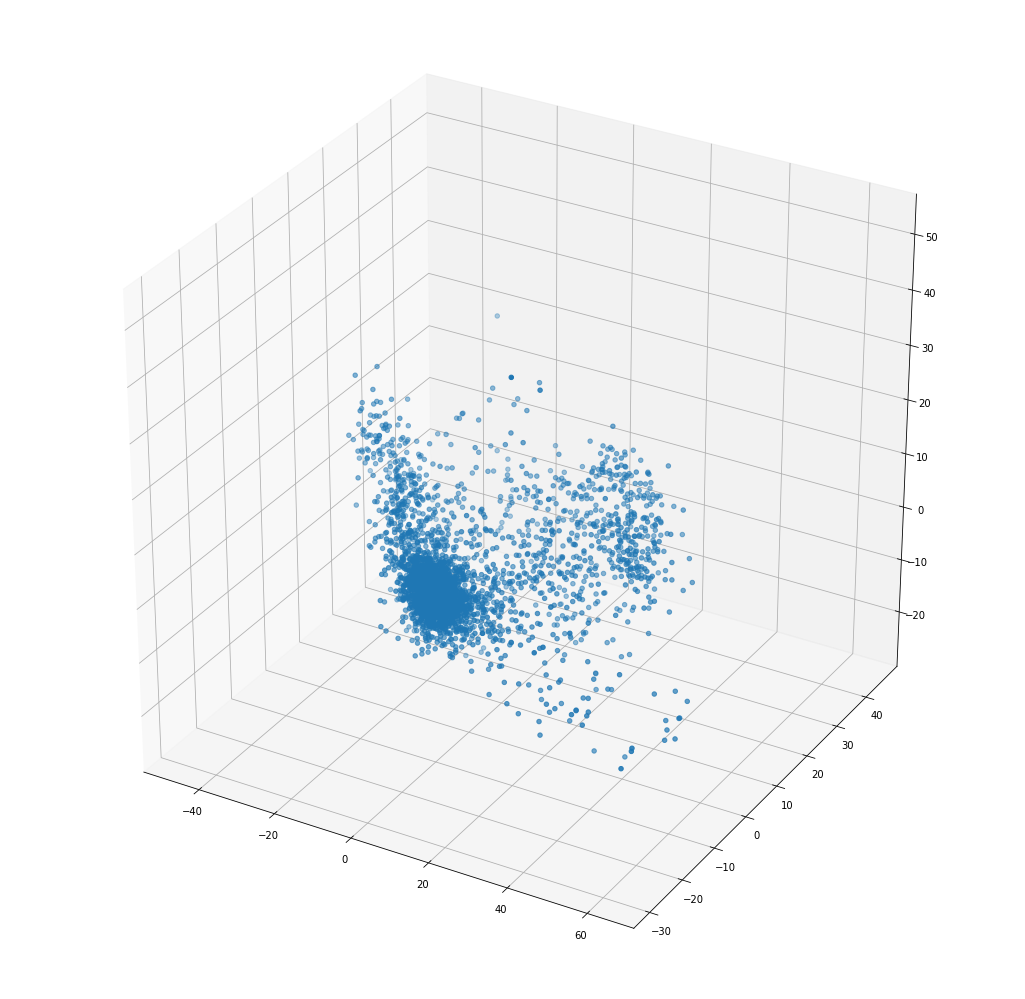

In [21]:
## Now we would like to plot the data! In a nutshell, we're going to transform it first, 
# for the plot to be more informative.

# ** Depending on your math level, read or skip this! **
# Rather than have the axes be the features, we will have the axes be combinations of features, 
# the combinations along which the data varies most. This method is called PCA, for Principal 
# Component Analysis. Never forget: before applying PCA, we need to standardize the data because 
# PCA relies on Euclidean distances between datapoints.

# To learn more about PCA, https://en.wikipedia.org/wiki/Principal_component_analysis

from sklearn.decomposition import PCA
import matplotlib.pyplot as p
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
# Data standardization
nX = (X-np.mean(X,0))/np.std(X, 0)
# Let us find the best projection and use it to transform the data.
npX = pca.fit_transform(nX)

# Now we can plot it.
f=p.figure(figsize=(18,18))
ax = f.gca(projection='3d')
ax.scatter(npX[:,0], npX[:,1], npX[:,2])
p.show()

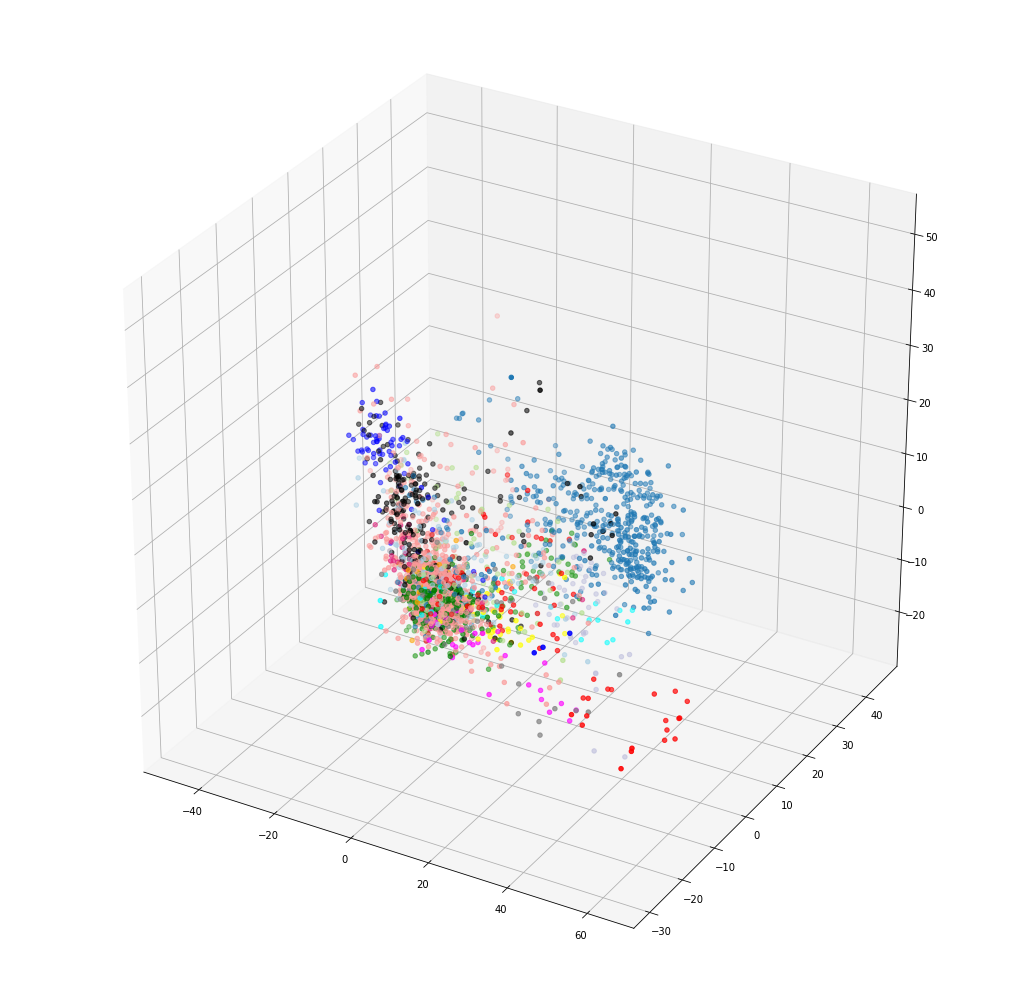

In [22]:
# This is all very well, but we would be interested to see how the drug classes are distributed in this space, not 
# only the datapoints. => Let us add colors

# Picking some colors
color_names = ['red', 'blue', 'orange', 'magenta', 'green','black', '0.5', '#bcbddc','yellow','cyan', '#a6cee3','#dd1c77', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a']

# These are the distinct drug classes present in the data.
distinct_drug_classes = sorted(list(Y.DrugClass.unique()))

# Picking the right color for each datapoint.
colors = []
drug_classes = Y.DrugClass.values
for drug_class in drug_classes:
    index = distinct_drug_classes.index(drug_class)
    colors.append(color_names[index])
    
# Let us plot again
f=p.figure(figsize=(18,18))
ax = f.gca(projection='3d')
ax.scatter(npX[:,0], npX[:,1], npX[:,2], color=colors)
p.show()

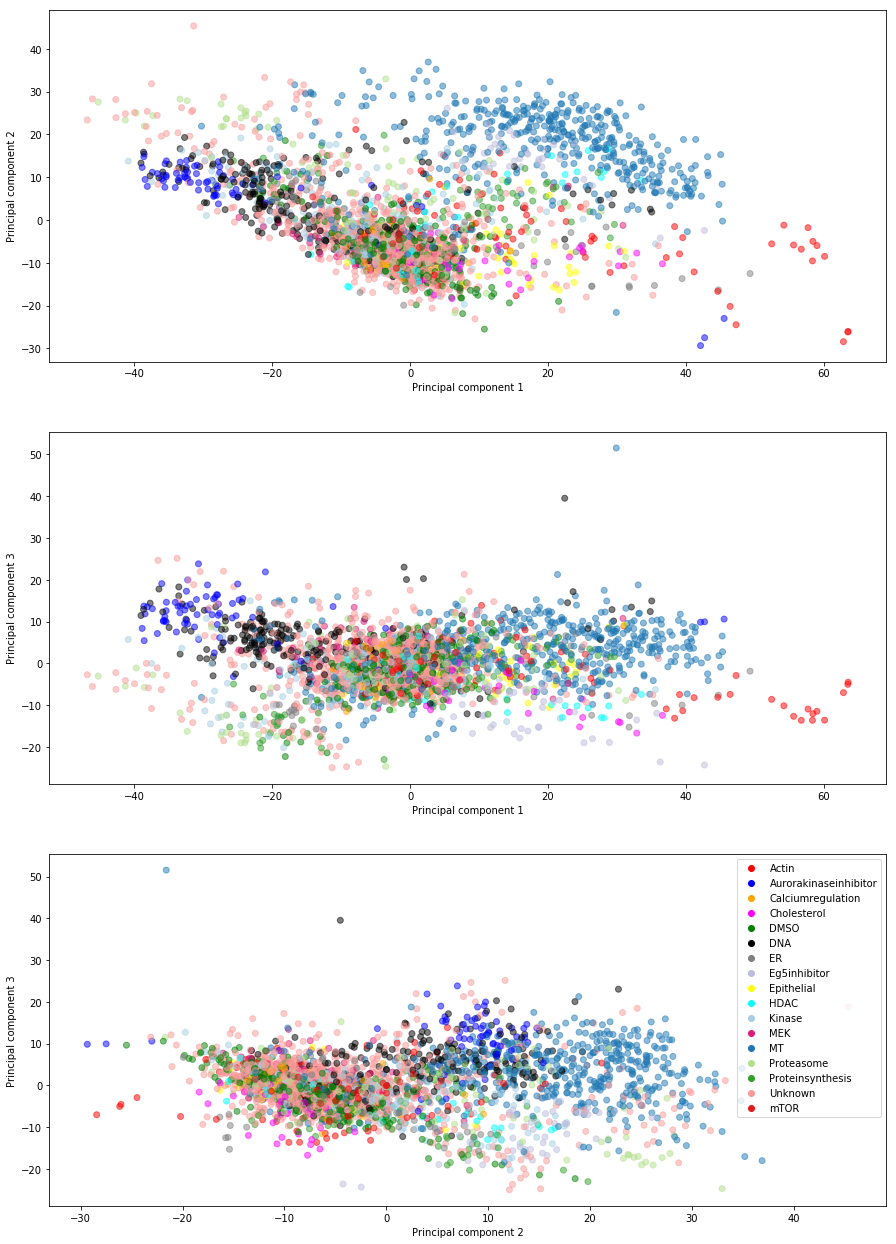

In [23]:
# 3D plots can sometimes be misleading because of the perspective. Furthermore, what do you think of 
# plots without a legend? => Let us plot in 2D, add a legend and label the axes.

f, subplots=p.subplots(3,1, figsize=(15,22))
subplots[0].scatter(npX[:,0], npX[:,1], color=colors, alpha=0.5)
subplots[0].set_xlabel('Principal component 1')
subplots[0].set_ylabel('Principal component 2')
subplots[1].scatter(npX[:,0], npX[:,2], color=colors, alpha=0.5)
subplots[1].set_xlabel('Principal component 1')
subplots[1].set_ylabel('Principal component 3')
subplots[2].scatter(npX[:,1], npX[:,2], color=colors, alpha=0.5)
subplots[2].set_xlabel('Principal component 2')
subplots[2].set_ylabel('Principal component 3')
# Adding the legend
for i, drug_class in enumerate(distinct_drug_classes):
    subplots[2].scatter(0,0, color=color_names[i], label=drug_class)
subplots[2].legend()

p.show()

In [11]:
# **Question** If you look into what is in Y, you will see that you also have the information whether a datapoint is 
# a positive control, a negative control, or an actual experiment. Can you tell the difference between the three?
# Better, can you redo the above plots, but with the colors corresponding to positive control, negative control,
# or other?

In [12]:
## Finally, the actual classification! For this, we will retrict ourselves to the subset of the data
# whose drug class is actually known, and which show activity at the dose used.

wh = np.where((Y.DrugClass=='Unknown')|(Y.Active==False))[0]
# Deleting the useless lines in the data
active_Y = Y.drop(wh, axis=0)
active_X = np.delete(X.values, wh, 0)

print('Nb of datapoints retained: ', active_X.shape[0])

Nb of datapoints retained:  879


In [19]:
# Now we are going to choose linear Support Vector Machines as our hypothesis space, ie, type of model.
from sklearn.svm import SVC
model = SVC(kernel='linear')

# Let us fit the model to the data
model.fit(active_X, active_Y.DrugClass)
predicted_Y = model.predict(active_X)

# Let us look at the error! We will compute the accuracy of the model and its confusion matrix. 
# The entry (i,j) of the confusion matrix will tell how many datapoints with true label i were predicted to be j.

from sklearn.metrics import confusion_matrix, recall_score
score = recall_score(active_Y.DrugClass, predicted_Y, average='micro')
print("Model accuracy: ", score)
conf_mat = confusion_matrix(active_Y.DrugClass, predicted_Y)
print(conf_mat)

# Pretty good! But... wait... what did we say about overfitting? Is this the right way to estimate the error
# of our model on new data??

Model accuracy:  0.997724687144
[[ 40   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  63   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   8   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  94   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  39   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  12   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  11   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  49   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   3   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 431   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0  41   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0  57   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   2]]


In [24]:
# **Question** Split the data into a training set and a test set as we discussed, and get a more accurate estimate
# of the model's accuracy on data it has never seen.